In [1]:
import numpy as np
from PIL import Image
from IPython.display import display
import copy
from sklearn.cluster import KMeans
import time
%matplotlib inline

In [2]:
def img2data(filePath):
    img = Image.open(filePath).convert(mode = 'RGB')
    r, g, b = img.split()
    x, y, z = np.array(img).shape 
    rArr = np.array(r).reshape(-1)
    gArr = np.array(g).reshape(-1)
    bArr = np.array(b).reshape(-1)
    data = np.array((rArr, gArr, bArr)).T
    return data, x

In [3]:
def data2img(data, x):
    xy, z = data.shape
    y = int(xy / x)
    r = Image.fromarray(data[:,0].reshape(x,y)).convert('L')
    g = Image.fromarray(data[:,1].reshape(x,y)).convert('L')
    b = Image.fromarray(data[:,2].reshape(x,y)).convert('L')
    img = Image.merge('RGB', (r, g, b))
    display(img)

In [4]:
def initParamsKMeans(data, k):
    initKmeans = KMeans(n_clusters = k)
    initKmeans.fit(data)
    mu = initKmeans.cluster_centers_
    label = initKmeans.predict(data).tolist()
    pi = np.array([label.count(j) / len(label) for j in range(k)])
    return mu, pi, label

In [5]:
def EStep(data, mu, pi, label):
    n, d = data.shape
    k = mu.shape[0]
    multiplier = np.zeros((n, k))
    w = np.zeros((n, k))
    for j in range(k):
        multiplier[:,j] = np.exp(np.array(-0.5 * (np.sum((data - mu[j,])**2, 1) - np.sum((data - mu[label])**2, 1))) * 0.01)
        # *.01 to avoid overflow
        w[:,j] = multiplier[:,j] * pi[j]
    for i in range(n):
        w[i,:] /= np.sum(w[i,:])
    q = np.sum(w * multiplier)
    label = np.array([np.argmax(i) for i in w])
    return w, label, q

def MStep(data, w):
    n, d = data.shape
    k = w.shape[1]
    mu = np.zeros((k, d))
    pi = np.zeros(k)
    for j in range(k):
        wSum = np.sum(w[:,j])
        mu[j,] = np.sum((w[:,j] * data.T), 1) / wSum
        pi[j] = wSum / n
    return mu, pi

In [6]:
def GMM_EM(data, k, threshold, init, verbose):
    if init == 'kmeans':
        mu, pi, label = initParamsKMeans(data, k)
    if init == 'random':
        n, d = data.shape
        mu = np.random.rand(k, d) * 255
        pi = [1/k for i in range(k)]
        label = np.random.randint(low = 0, high = k, size = n)
    delta_q = EStep(data, mu, pi, label)[2]
    old_q = 0
    i = 0
    while delta_q >= threshold:
        w, label, q = EStep(data, mu, pi, label)
        mu, pi = MStep(data, w)
        delta_q = abs(q - old_q)
        if verbose:
            print('{sep} Iteration {i} {sep}'.format(sep='-' * 20, i=i+1))
            print('mu:\n{}\npi:\n{}\ndelta_q: {}'.format(mu, pi, delta_q))
        old_q = copy.deepcopy(q)
        i += 1
    return mu, pi, label

In [7]:
def segImg(data, x, k, threshold = 100, init = 'kmeans', verbose = False):
    mu, pi, label = GMM_EM(data, k, threshold, init, verbose)
    seg = np.array(list([mu[label[i],:] for i in range(data.shape[0])]))
    data2img(seg, x)

In [8]:
d1, x1 = img2data('test1.jpg')
d2, x2 = img2data('test2.jpg')
d3, x3 = img2data('test3.jpg')
d4, x4 = img2data('test4.jpg')

# trees

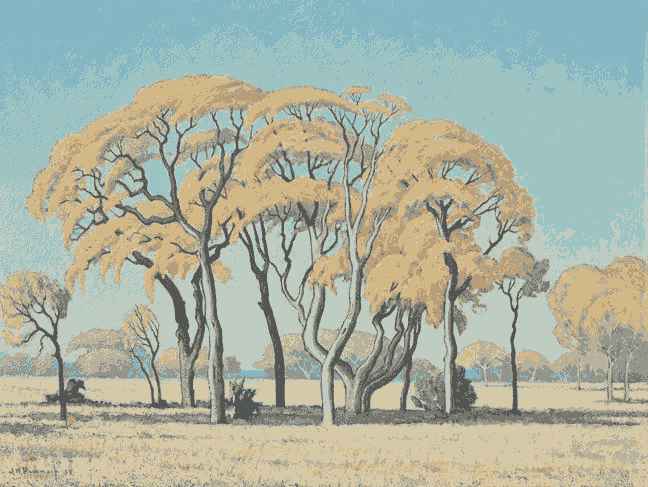

In [10]:
segImg(d1, x1, 10)

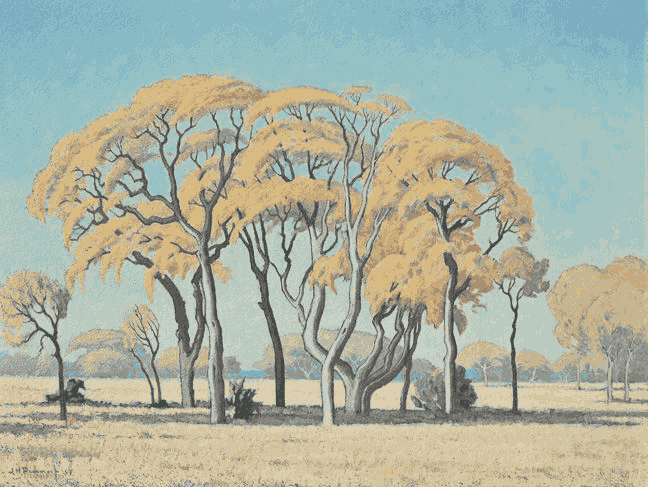

In [13]:
segImg(d1, x1, 20, threshold = 200)

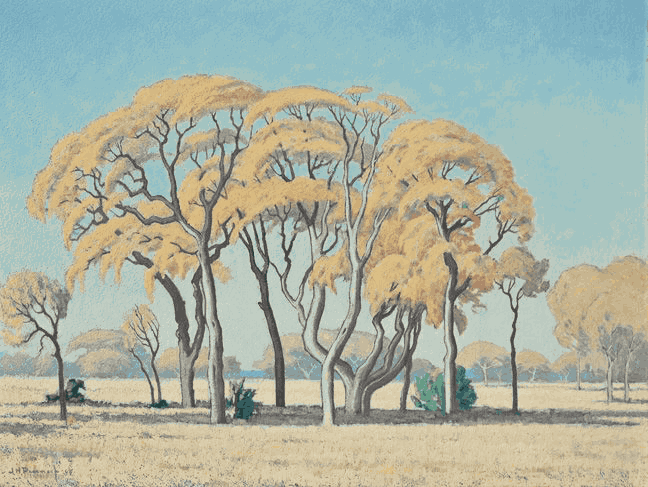

In [14]:
segImg(d1, x1, 50, threshold = 500)

# robert mixed

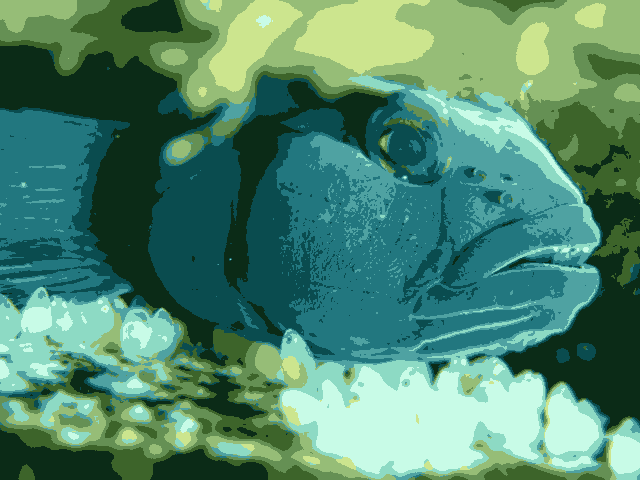

In [15]:
segImg(d2, x2, 10)

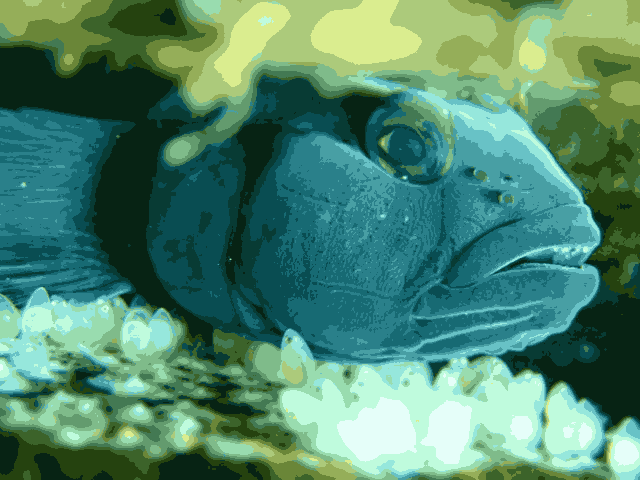

In [16]:
segImg(d2, x2, 20, threshold = 200)

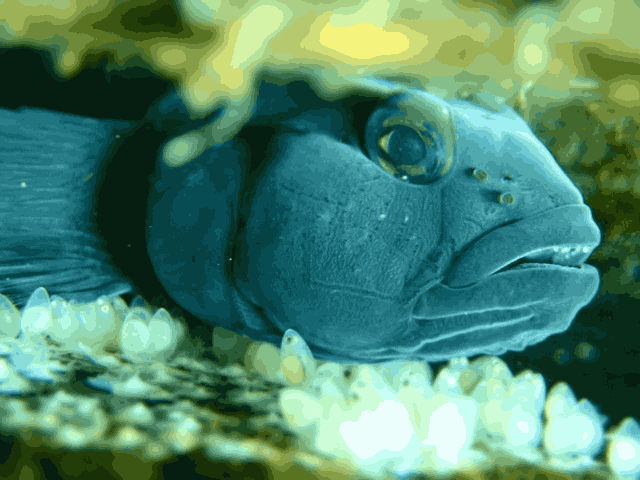

In [17]:
segImg(d2, x2, 50, threshold = 500)

# small strelitzia

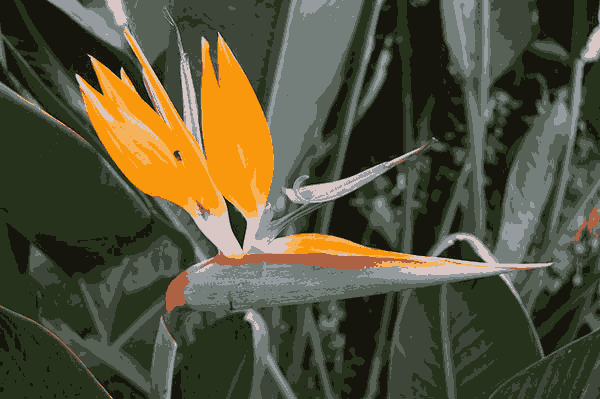

In [18]:
segImg(d3, x3, 10)

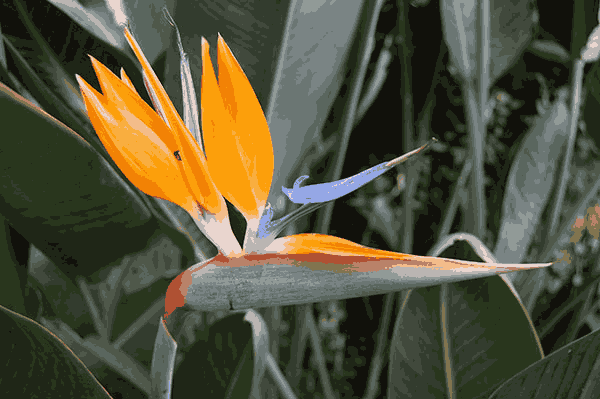

In [19]:
segImg(d3, x3, 20, threshold = 200)

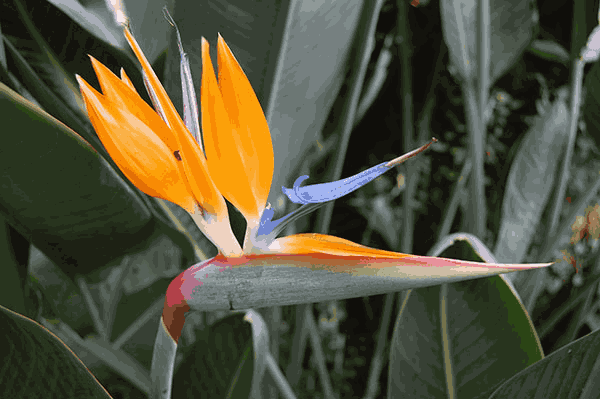

In [20]:
segImg(d3, x3, 50, threshold = 500)

# small sunset

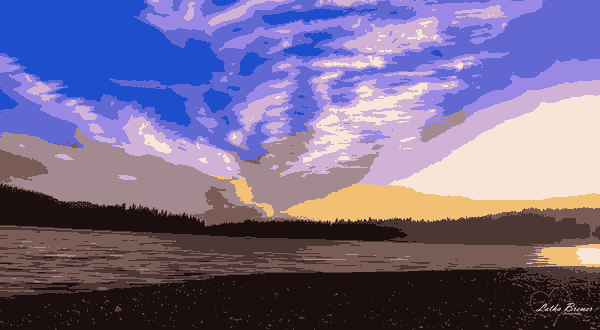

In [21]:
segImg(d4, x4, 10)

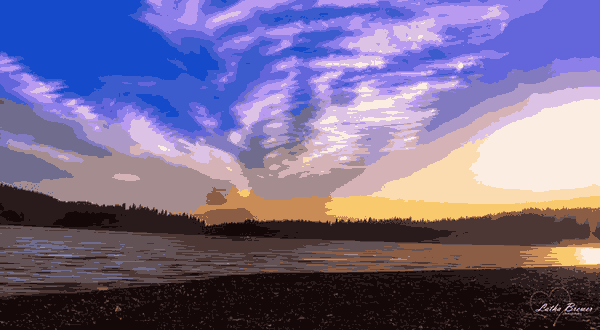

In [22]:
segImg(d4, x4, 20, threshold = 200)

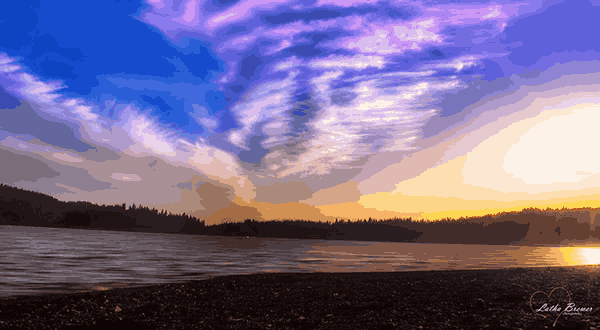

In [23]:
segImg(d4, x4, 50, threshold = 500)

# trees with 5 different initial points

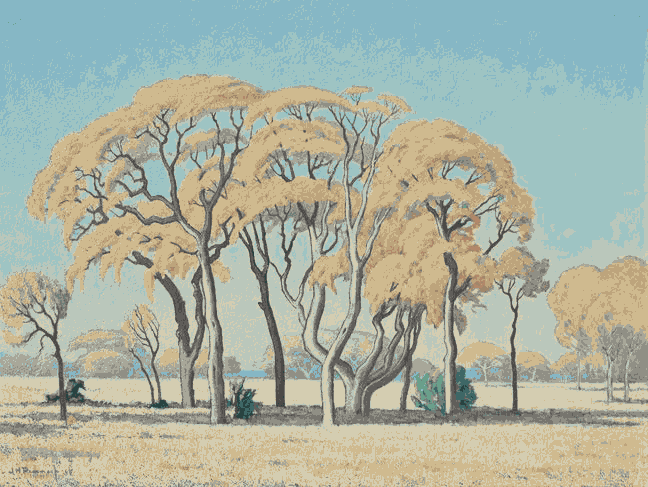

In [24]:
segImg(d1, x1, 20, threshold = 50000, init = 'random')

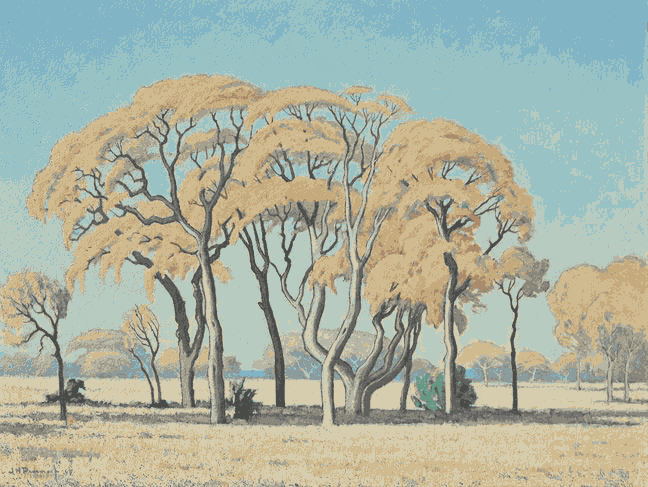

In [25]:
segImg(d1, x1, 20, threshold = 50000, init = 'random')

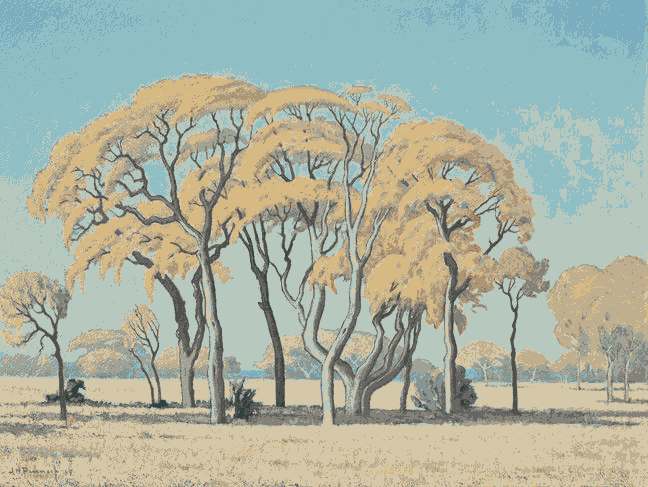

In [26]:
segImg(d1, x1, 20, threshold = 50000, init = 'random')

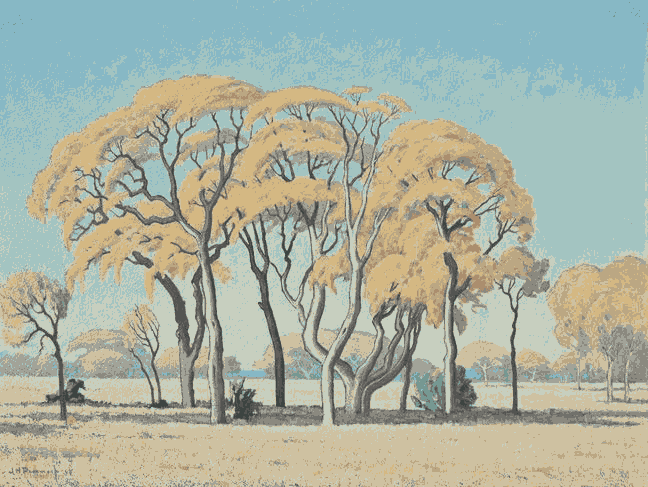

In [27]:
segImg(d1, x1, 20, threshold = 50000, init = 'random')

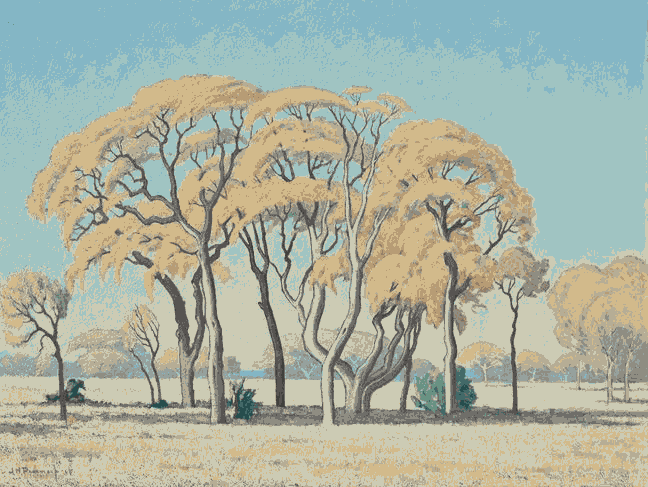

In [28]:
segImg(d1, x1, 20, threshold = 50000, init = 'random')

In [126]:
## by c.c.

qs = []
for i in range(80):
    print(i)
    label_map = {}
    for i in cluster_labels:
        label_map[i] = cluster_centers[i]
        
    close_center = np.array([label_map[label] for label in cluster_labels])
    numerator = np.zeros((len(data), seg_num))
    for j in range(seg_num):
        numerator[:,j] = -0.5 * (np.sum((data- cluster_centers[j,])**2, 1) - np.sum((data - close_center)**2, 1))
    w = np.matmul(np.exp(numerator), np.diag(pi_list))
    w = (w.T/np.sum(w,1)).T
    q = np.sum(numerator*w)
    cluster_labels = np.array([np.argmax(i) for i in w])
    
    for j in range(seg_num):
        cluster_centers[j,] = np.sum((data.T * w[:,j]).T, 0) / np.sum(w[:,j])
    pi_list = np.sum(w,0) / len(data)
    
    if (qs != []) and (abs(q-qs[-1]) < 0.1):
        qs.append(q)
        break
    qs.append(q)

0
1


In [155]:
from sklearn.mixture import GaussianMixture

In [156]:
GMM = GaussianMixture(n_components=3)

In [157]:
GMM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [158]:
GMM.means_

array([[161.45017313, 161.33419831, 161.12590808],
       [195.65880488, 195.71014549, 195.65404247],
       [153.14923548, 153.32117033, 154.02710338]])